In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression

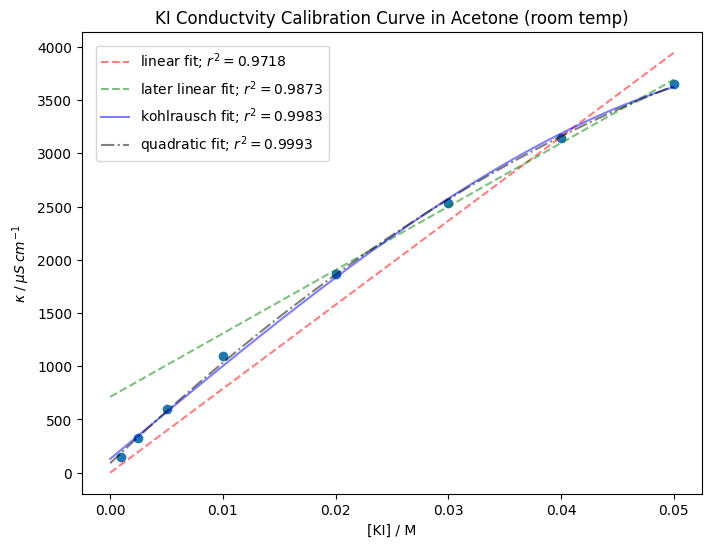

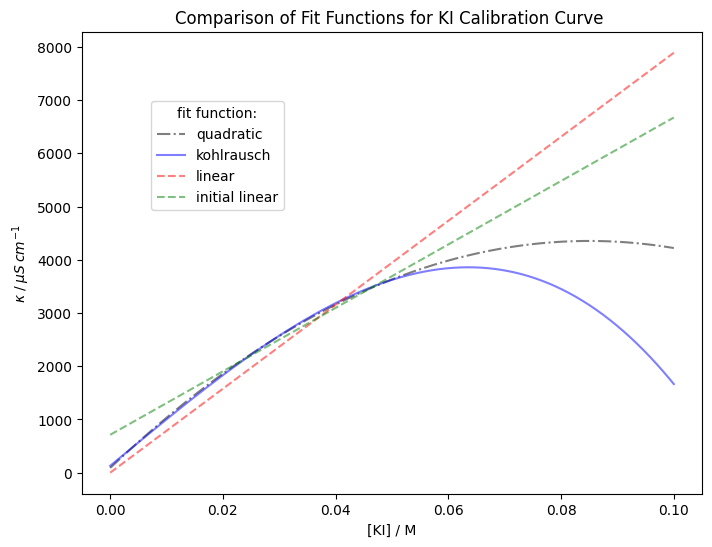

/var/folders/3n/95jg4lk951v3w70mx0z383s00000gn/T/ipykernel_54494/1984184764.py:2: RuntimeWarning: invalid value encountered in sqrt
  return y * ( l_0 - onsager_alpha(l_0,D,T,eta) * np.sqrt(x * y) )


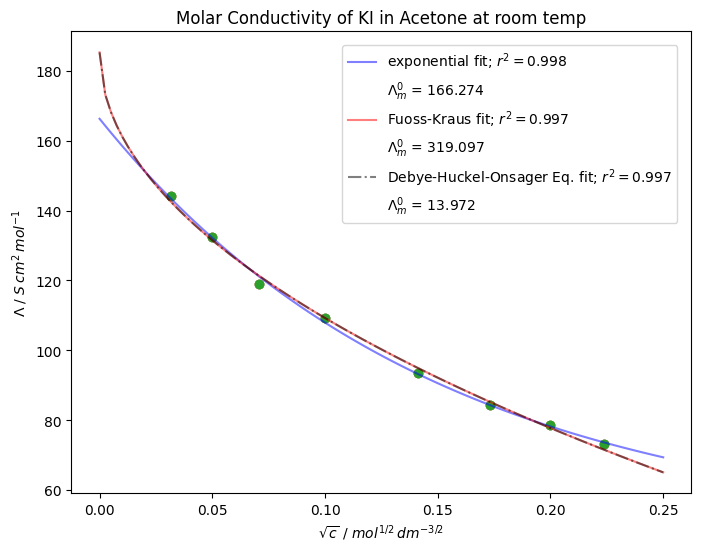

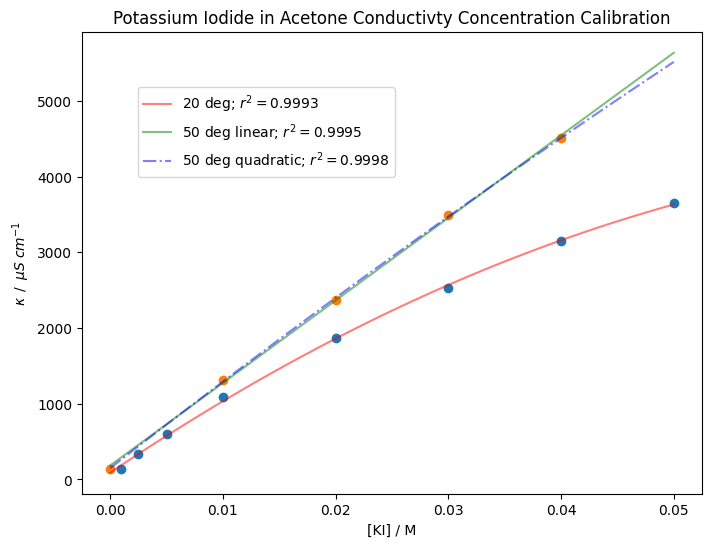

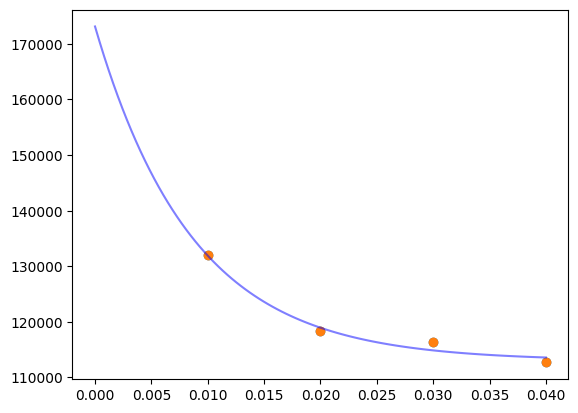

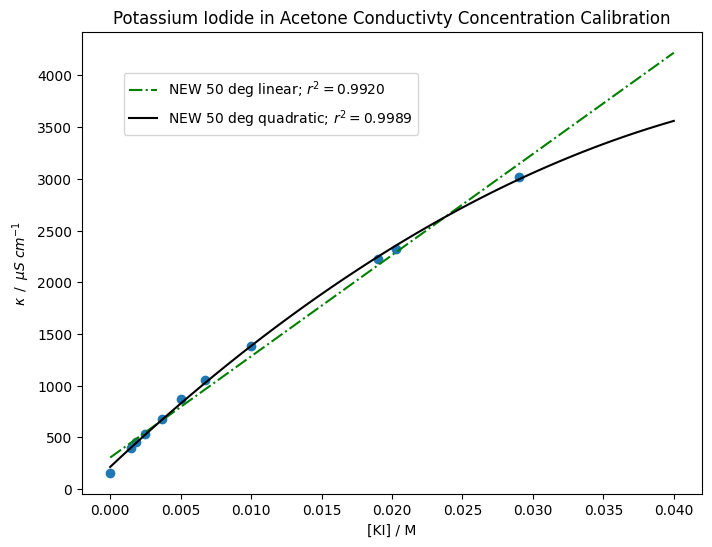

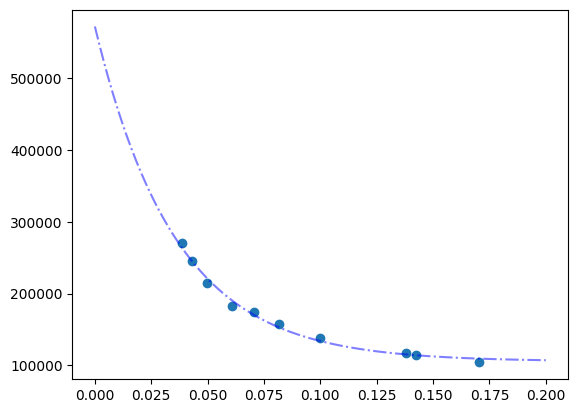

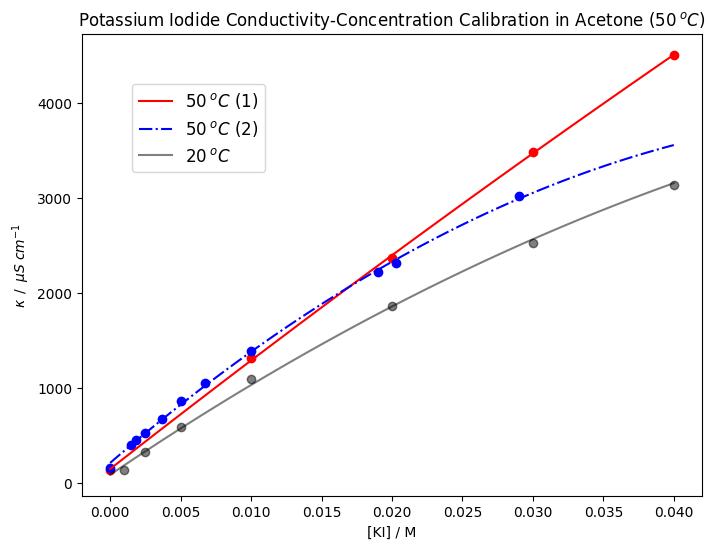

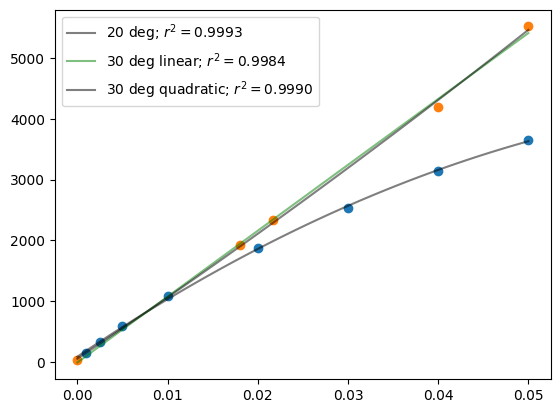

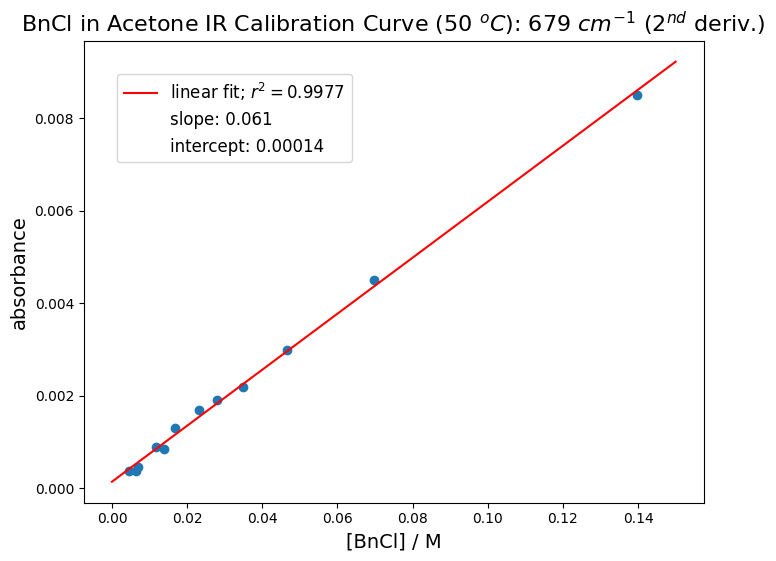

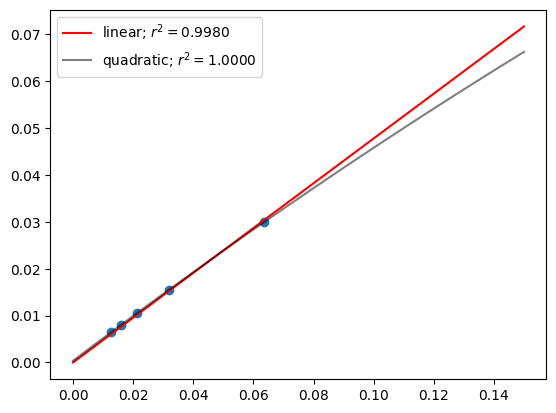

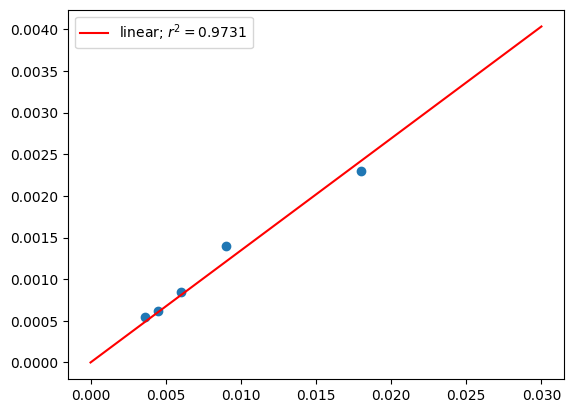

In [4]:
# import calibration curves from "acetone_cal.ipynb"
%run acetone_cal.ipynb

In [5]:
# integrated bimolecular rate equation
def c_second(x,a,b,k):
  return (a - b) * ( 1 / ( 1 - b/a * np.exp( - k * x * (a - b) ) ) - 1 )

In [6]:
# unimolecular rate equation
def exp(x,b,k):
  return b * np.exp(- k * x)

In [22]:
with open('ac_50_3.csv') as f:
    reader = csv.reader(f)
    data = list(reader)

In [23]:
xs = np.array(data).astype(float)[:,0]

In [24]:
data = np.array(data).astype(float)[:,1]

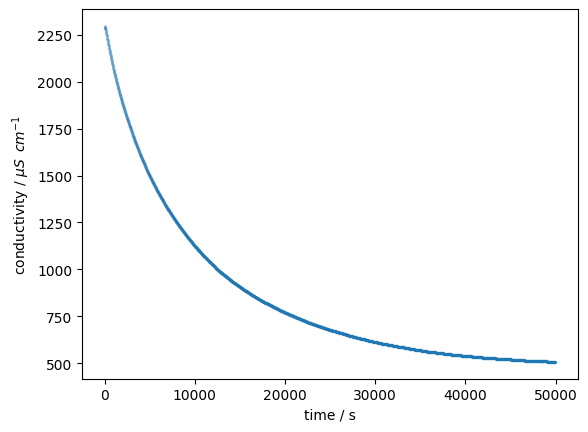

In [25]:
plt.scatter(xs,data,s=2,alpha=0.1,marker='o')
plt.xlabel('time / s')
plt.ylabel('conductivity / $\mu S \hspace{.5} cm^{-1}$')
plt.show()

In [26]:
vol = 30
m_bncl = 0.0960
vol += m_bncl / 1.1 # account for volume of BnCl
n_ki = 0.1010 / 166.0028
n_bncl = m_bncl / 126.58
b = 1000 * n_ki / vol
a = 1000 * n_bncl / vol

In [27]:
a

0.025207125229341876

In [28]:
b

0.020221954907320563

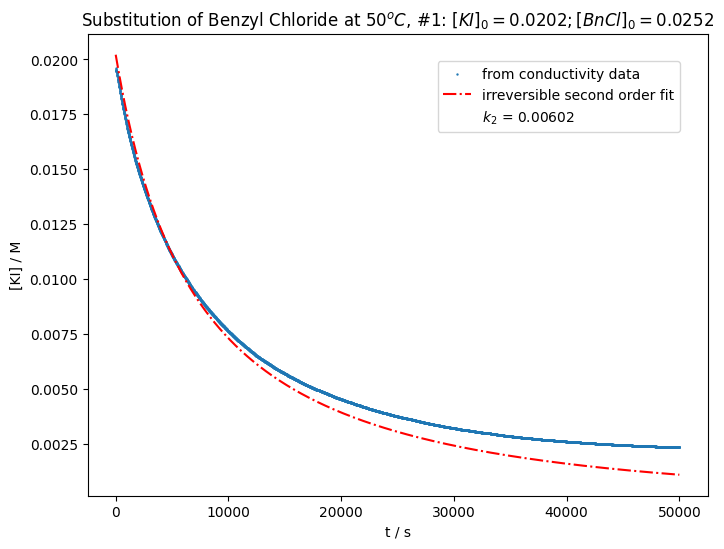

In [29]:
x = xs
y = np.array( inv_quad_p(data,*popt50n_i) )

plt.figure(figsize=(8,6))
plt.scatter(x,y,s=.5,alpha=1,marker='o',label='from conductivity data')

# Bimolecular fit on first 10000s of reaction
popt, pcov = curve_fit( lambda x, k: c_second(x,a,b,k), x[:1000] , y[:1000] , p0=[0.0005])
k2 = popt[0]
plt.plot(x,c_second(x,a,b,k2),'r-.',label='irreversible second order fit')


plt.plot([],[],alpha=0,label=f'$k_2$ = {k2:.5f}')

plt.xlabel('t / s')
plt.ylabel('[KI] / M')
plt.title(f'Substitution of Benzyl Chloride at $50^oC$, #1: $[KI]_0 = {b:.4f}; [BnCl]_0 = {a:.4f}$')
plt.legend(borderaxespad=2)

plt.show()

In [30]:
d_eq = y[0] - y[-1]

In [31]:
a - d_eq

0.007953420956621465

In [32]:
b - d_eq

0.0029682506346001523

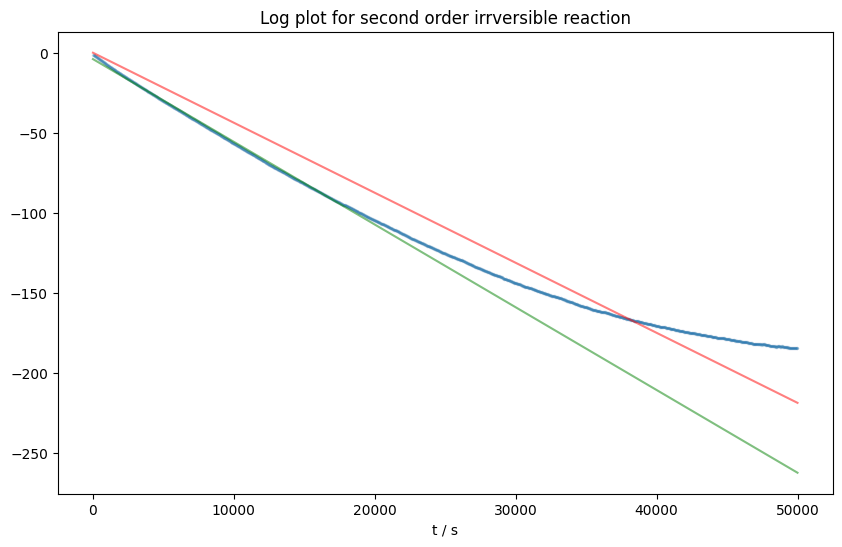

In [33]:
s_y = np.log( a/b * y / ((a - b) + y) ) / (a - b)
plt.figure(figsize=(10,6))
plt.scatter(x,s_y,s=2,alpha=0.05,marker='o')

# straight line fit for whole rxn
lin_reg = LinearRegression(fit_intercept=False)
lin_reg.fit(x.reshape(-1,1),s_y.reshape(-1,1))
m = lin_reg.coef_[0][0]
plt.plot(x,(m*x),'r-',alpha=0.5)

# straight line for start of rxn
lin_reg2 = LinearRegression(fit_intercept=True)
lin_reg2.fit(x[:2000].reshape(-1,1),s_y[:2000].reshape(-1,1))
m2 = lin_reg2.coef_[0][0]
int2 = lin_reg2.intercept_[0]
plt.plot(x,(m2*x + int2),'g-',alpha=0.5)

plt.title('Log plot for second order irrversible reaction')
plt.xlabel('t / s')


plt.show()

In [34]:
m

-0.004379148460189767

In [35]:
m2

-0.005173636189656527

In [36]:
k2

0.006020298927902818